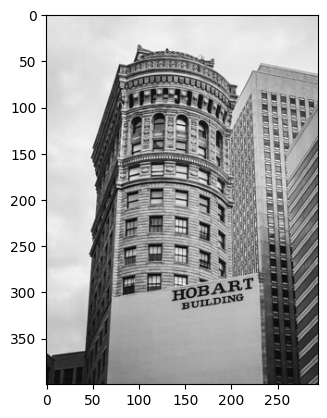

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
image_array = plt.imread('./building.jpg')
if len(image_array.shape) == 3:
    image_array = image_array.mean(axis=2)
plt.imshow(image_array, cmap='gray')
plt.show()

In [3]:
def convo2d(input, kernel):
  H,W = input.shape
  M,N = kernel.shape
  out = np.zeros((H-M+1,W-N+1), dtype=float)
  kernel = np.flip(kernel)
  for i in range(H-M+1):
    for j in range(W-N+1):
      out[i,j] = np.sum( input[i:i+M,j:j+N] * kernel)
  return out

In [12]:
gaussian_kernel = np.array([[1,2,1],
                            [2,4,2],
                            [1,2,1]])
gaussian_kernel = gaussian_kernel/gaussian_kernel.sum()
convo_out_blur = convo2d(image_array, gaussian_kernel)

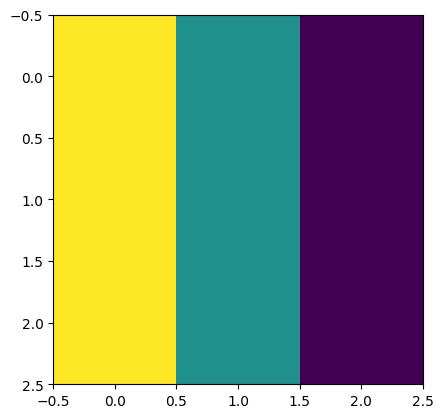

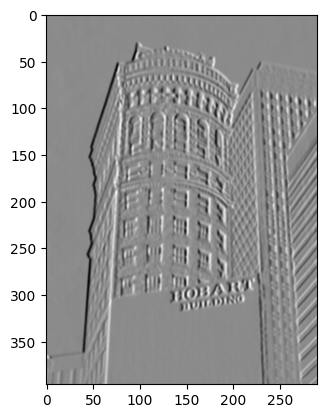

In [17]:

verti_sobel = np.zeros((3, 3), dtype=float)
verti_sobel[:,0] = 1.0
verti_sobel[:,2] = -1.0
plt.imshow(verti_sobel)
plt.show()
convo_out_vert = convo2d(convo_out_blur, verti_sobel)
plt.imshow(convo_out_vert,cmap="gray")
plt.show()

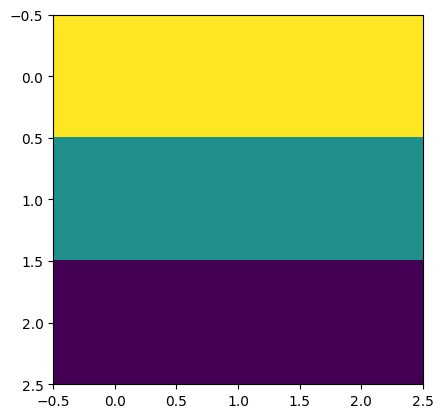

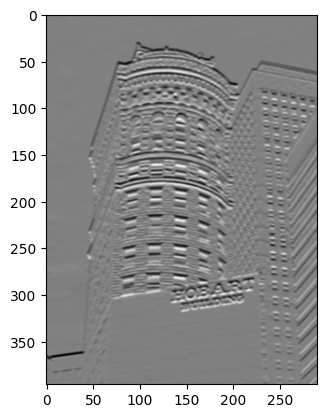

In [18]:
horiz_sobel = verti_sobel.T
plt.imshow(horiz_sobel)
plt.show()
convo_out_horiz = convo2d(convo_out_blur, horiz_sobel)
plt.imshow(convo_out_horiz,cmap="gray")
plt.show()

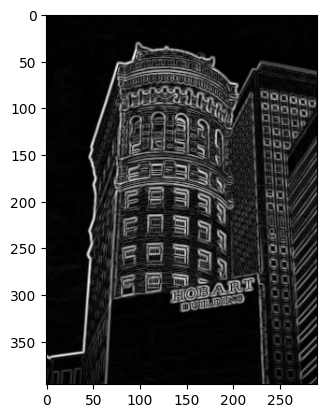

In [19]:
conv_out_mag = (convo_out_vert**2 + convo_out_horiz**2)**0.5
conv_out_mag_norm = conv_out_mag / (255*2)
plt.imshow(conv_out_mag,cmap="gray")

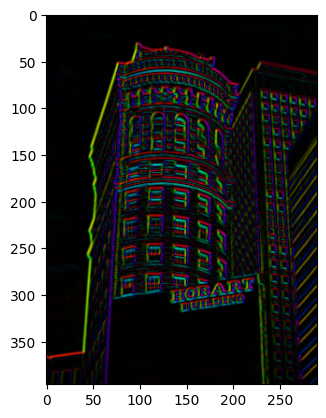

In [20]:

conv_dir = np.arctan2(convo_out_vert,(convo_out_horiz));
conv_dir_norm = (conv_dir + np.pi)/ (np.pi*2)
rgb_image = matplotlib.colors.hsv_to_rgb(np.stack((conv_dir_norm,
                                                   np.ones_like(conv_dir_norm),
                                                   conv_out_mag_norm),
                                                   axis = -1))
plt.imshow(rgb_image)